In [35]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [37]:
with open('sarcasm.json','r') as f:
    datastore = json.load(f)

In [38]:
sentences = []
labels =[]
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [39]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [40]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [41]:
#Only tokenize training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [42]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [43]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           160000    
                                                                 
 dropout_4 (Dropout)         (None, 100, 16)           0         
                                                                 
 global_average_pooling1d_5   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
________________________________________________

In [61]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6812 - accuracy: 0.5591 - val_loss: 0.6716 - val_accuracy: 0.5633 - 2s/epoch - 4ms/step
Epoch 2/30
625/625 - 2s - loss: 0.6527 - accuracy: 0.5861 - val_loss: 0.6300 - val_accuracy: 0.6788 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 4s - loss: 0.5951 - accuracy: 0.7343 - val_loss: 0.5677 - val_accuracy: 0.7869 - 4s/epoch - 7ms/step
Epoch 4/30
625/625 - 2s - loss: 0.5281 - accuracy: 0.8117 - val_loss: 0.5115 - val_accuracy: 0.8188 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.4725 - accuracy: 0.8361 - val_loss: 0.4703 - val_accuracy: 0.8235 - 2s/epoch - 2ms/step
Epoch 6/30
625/625 - 2s - loss: 0.4306 - accuracy: 0.8470 - val_loss: 0.4379 - val_accuracy: 0.8310 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 4s - loss: 0.3978 - accuracy: 0.8587 - val_loss: 0.4149 - val_accuracy: 0.8366 - 4s/epoch - 7ms/step
Epoch 8/30
625/625 - 4s - loss: 0.3715 - accuracy: 0.8664 - val_loss: 0.3982 - val_accuracy: 0.8402 - 4s/epoch - 7ms/step
Epoch 9/30
625/625 - 2s 

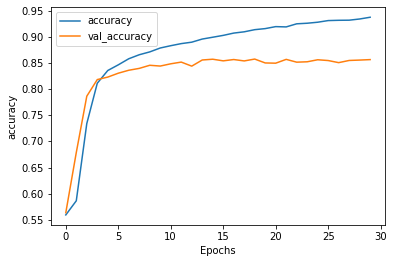

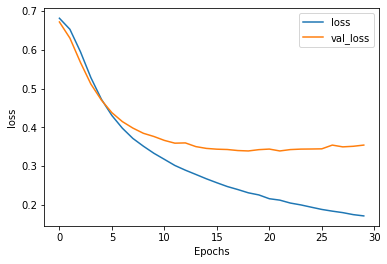

In [62]:
import matplotlib.pyplot as plt
 
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")  

In [108]:
test_sentence =["pope francis wearing sweater vestments he got for christmas"
    
]

In [109]:
test_seq = tokenizer.texts_to_sequences(test_sentence)
padded = pad_sequences(test_seq, maxlen=max_length, padding= padding_type, truncating=trunc_type)

In [110]:
model.predict(padded)

array([[0.88036454]], dtype=float32)